In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_excel("jharkhand.xlsx")

In [3]:
data['Timestamp']=pd.to_datetime(data.Timestamp)

C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='demand'>

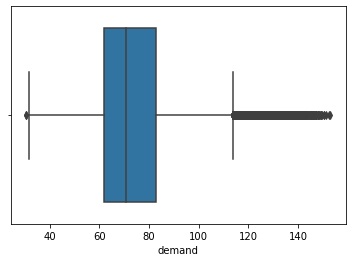

In [4]:
sns.boxplot(data['demand'])

In [5]:
percentile25 = data['demand'].quantile(0.25)
percentile75 = data['demand'].quantile(0.75)

In [6]:
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [7]:
new_df = data.copy()

new_df['demand'] = np.where(
    new_df['demand'] > upper_limit,
    upper_limit,
    np.where(
        new_df['demand'] < lower_limit,
        lower_limit,
        new_df['demand']
    )
)

C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='demand'>

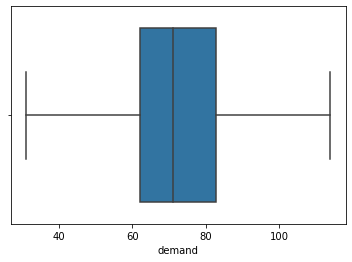

In [8]:
sns.boxplot(new_df['demand'])

In [9]:
df=new_df.iloc[:]

In [10]:
cols=list(df)[1:2]

In [11]:
dataset = df[cols].astype(float)

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

In [13]:
# Using 400 days as train and 58 days for testing

In [14]:
train,test = dataset[:38400],dataset[38400:]

In [15]:
n_future=1
n_past=96

In [16]:
def splitter(dataset,seq_size):
    X=[]
    Y=[]
    for i in range(len(dataset) - seq_size-1):
        window=dataset[i:(i+seq_size),0]
        X.append(window)
        Y.append(dataset[i+seq_size,0])
    return np.array(X),np.array(Y)


In [17]:
seq_size=96

In [18]:
trainX,trainY=splitter(train,seq_size)
testX,testY=splitter(test,seq_size)

In [19]:
f = pd.DataFrame(trainX)
f['96'] = trainY
f

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.387527,0.439987,0.258854,0.289077,0.317216,0.299911,0.235040,0.231216,0.215319,0.157482,...,0.384692,0.426636,0.413617,0.434351,0.497525,0.458927,0.358109,0.340664,0.495914,0.443083
1,0.439987,0.258854,0.289077,0.317216,0.299911,0.235040,0.231216,0.215319,0.157482,0.209552,...,0.426636,0.413617,0.434351,0.497525,0.458927,0.358109,0.340664,0.495914,0.443083,0.474236
2,0.258854,0.289077,0.317216,0.299911,0.235040,0.231216,0.215319,0.157482,0.209552,0.196070,...,0.413617,0.434351,0.497525,0.458927,0.358109,0.340664,0.495914,0.443083,0.474236,0.422995
3,0.289077,0.317216,0.299911,0.235040,0.231216,0.215319,0.157482,0.209552,0.196070,0.236838,...,0.434351,0.497525,0.458927,0.358109,0.340664,0.495914,0.443083,0.474236,0.422995,0.452201
4,0.317216,0.299911,0.235040,0.231216,0.215319,0.157482,0.209552,0.196070,0.236838,0.290142,...,0.497525,0.458927,0.358109,0.340664,0.495914,0.443083,0.474236,0.422995,0.452201,0.403448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38298,0.943106,1.000000,0.983565,0.953910,1.000000,1.000000,1.000000,1.000000,1.000000,0.995966,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993327,0.818662,0.839572
38299,1.000000,0.983565,0.953910,1.000000,1.000000,1.000000,1.000000,1.000000,0.995966,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993327,0.818662,0.839572,0.891579
38300,0.983565,0.953910,1.000000,1.000000,1.000000,1.000000,1.000000,0.995966,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.993327,0.818662,0.839572,0.891579,0.898811
38301,0.953910,1.000000,1.000000,1.000000,1.000000,1.000000,0.995966,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.993327,0.818662,0.839572,0.891579,0.898811,0.917228


In [20]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [21]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True, input_shape=(None,seq_size)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')


In [22]:
model.fit(trainX,trainY,validation_data=(testX,testY),verbose=2,epochs=2)

Epoch 1/2
1197/1197 - 12s - loss: 0.0101 - val_loss: 0.0036 - 12s/epoch - 10ms/step
Epoch 2/2
1197/1197 - 5s - loss: 0.0070 - val_loss: 0.0033 - 5s/epoch - 5ms/step


In [23]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

171/171 [==============================] - 0s 3ms/step


In [24]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [41]:
dataset

array([[0.38752685],
       [0.43998726],
       [0.2588542 ],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

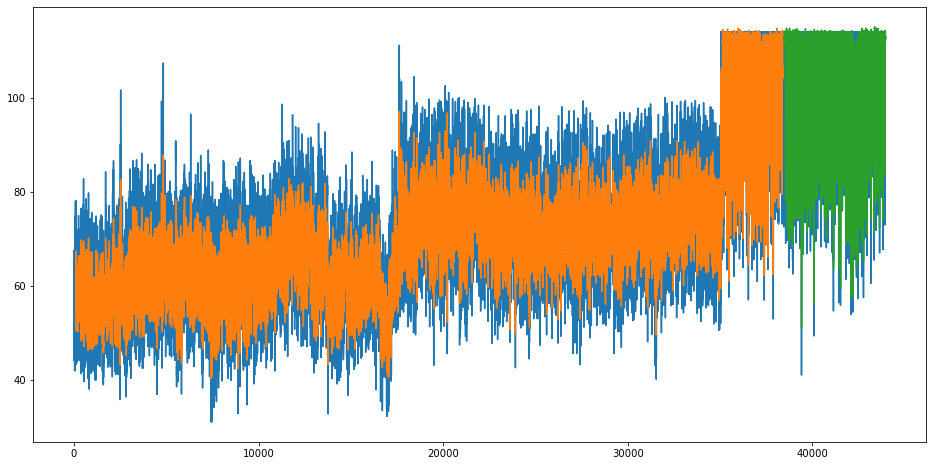

In [26]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
def mean_squared_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.square((y_true - y_pred) / y_true)) * 100

In [28]:
mspe = mean_squared_percentage_error(testY[0],testPredict[:,0])
print(f'Mean Squared Percentage Error: {mspe:.2f}%')

Mean Squared Percentage Error: 0.27%
